<a href="https://colab.research.google.com/github/setyanoegraha/college-computer-vision-2025/blob/main/jobsheet-03/jobsheet3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JOBSHEET 03: TEKNIK REGRESI GAMBAR

## Praktikum D1 - Regresi dari Citra Sintetis (Prediksi Radius Lingkaran)

### 1) Setup & Generator Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras import layers, models

# Generator 1 sample
def make_sample(img_size=64, min_r= 5, max_r=20):
  r = np.random.randint(min_r, max_r +1) # radius acak
  img = np.zeros((img_size, img_size), dtype=np.uint8)
  cx = np.random.randint(r, img_size - r) # center-x
  cy = np.random.randint(r, img_size - r) # center-y
  cv2.circle(img, (cx, cy), r, 255, -1)   # lingkaran putih terisi
  img = (img / 255.0).astype(np.float32)
  # 3-channel biar kompatibel CNN
  img3 = np.stack([img, img, img], axis=-1)
  return img3, float(r), (cx, cy)

### 2) "Tebak Apa?" - Tampilkan Contoh Gambar TANPA Label

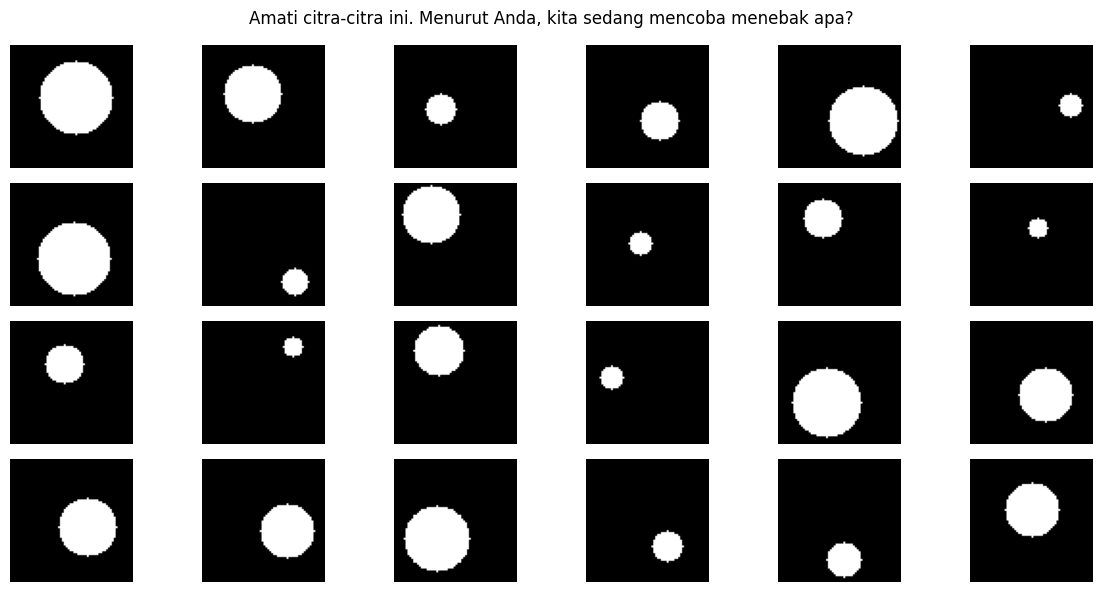

In [ ]:
# Buat 24 contoh untuk visualisasi
N_show = 24
samples = [make_sample() for _ in range(N_show)]
imgs = [s[0] for s in samples]
rads = [s[1] for s in samples]
centers = [s[2] for s in samples]
# Grid gambar tanpa label:
cols = 6
rows = N_show // cols
plt.figure(figsize=(12, 6))
for i in range(N_show):
  plt.subplot(rows, cols, i+1)
  plt.imshow(imgs[i].squeeze(), cmap='gray')
  plt.axis('off')
plt.suptitle("Amati citra-citra ini. Menurut Anda, kita sedang mencoba menebak apa?")
plt.tight_layout()
plt.show()

### 3) Buka Jawaban - Target yang Ingin Diprediksi

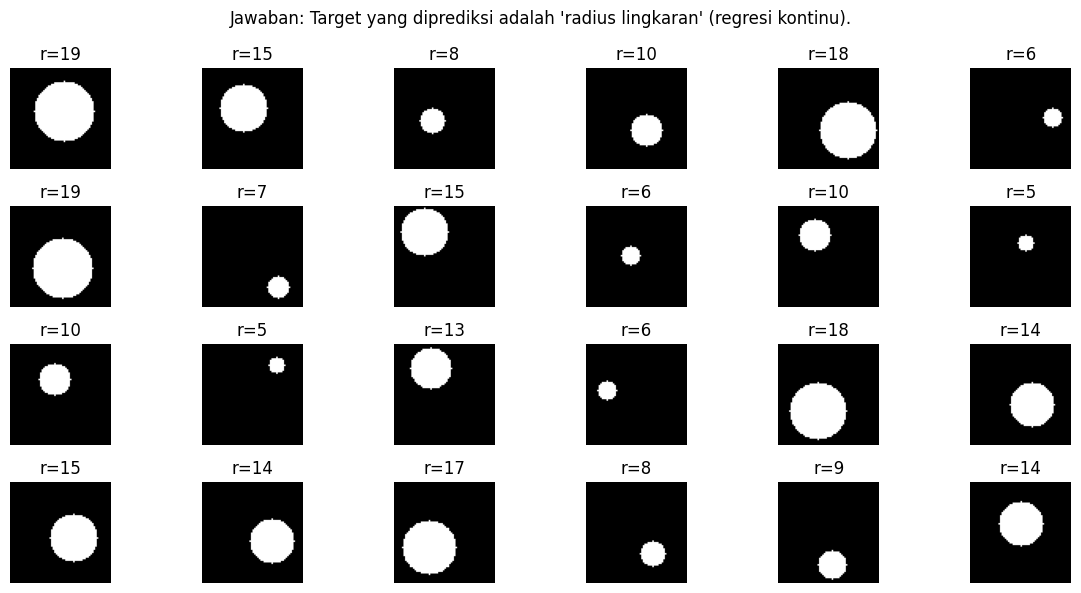

In [ ]:
# Tampilkna kembali, sekarang tampilkan radius (label) di judul tiap subplot
plt.figure(figsize=(12, 6))
for i in range(N_show):
  plt.subplot(rows, cols, i+1)
  plt.imshow(imgs[i].squeeze(), cmap='gray')
  plt.title(f"r={int(rads[i])}")
  plt.axis('off')
plt.suptitle("Jawaban: Target yang diprediksi adalah 'radius lingkaran' (regresi kontinu).")
plt.tight_layout()
plt.show()

### 4) Latih CNN Kecil untuk Memprediksi Radius

In [ ]:
# Siapkan dataset lebih besar untuk training
N = 3000
X, y, C = zip(*[make_sample() for _ in range(N)])
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

# Model CNN sederhana
model = models.Sequential([
    layers.Input((64, 64, 3)),
    layers.Conv2D(32, 3, activation='relu'), layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'), layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'), layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1) # output regresi
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(Xtr, ytr, validation_data=(Xte, yte), epochs=12, batch_size=64, verbose=0)

# Evaluasi
y_pred = model.predict(Xte).ravel()
mae = mean_absolute_error(yte, y_pred)
rmse = float(np.sqrt(np.mean((yte - y_pred) **2)))
r2 = r2_score(yte, y_pred)
print(f"MAE={mae:.3f} | RMSE={rmse:.3f} |  R²={r2:.3f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
MAE=1.002 | RMSE=1.217 |  R²=0.930


**Plot history & True vs Predicted:**

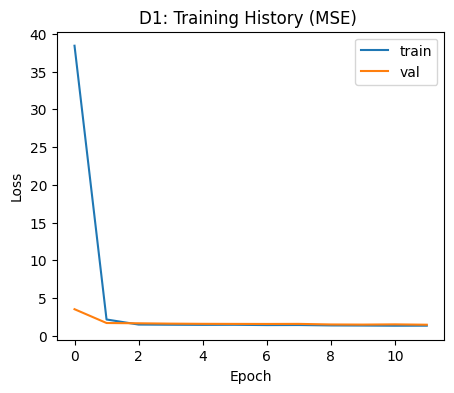

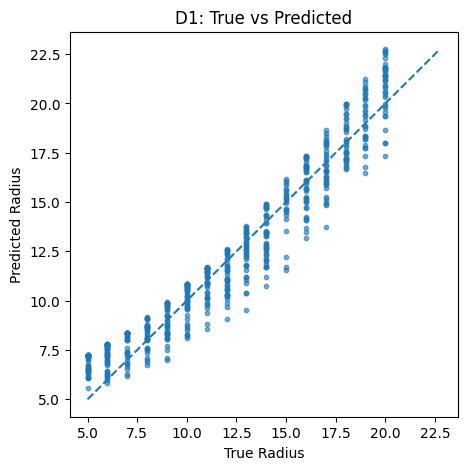

In [ ]:
# Plot loss
plt.figure(figsize=(5, 4))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("D1: Training History (MSE) ")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Scatter True vs Pred
plt.figure(figsize=(5,5))
plt.scatter(yte, y_pred, s=10, alpha=0.6)
lims = [min(yte.min(), y_pred.min()), max(yte.max(), y_pred.max())]
plt.plot(lims, lims, '--')
plt.xlabel("True Radius")
plt.ylabel("Predicted Radius")
plt.title("D1: True vs Predicted")
plt.show()

### 5) Tantangan Mini

=== [Eksperimen 1] Radius Lebih Lebar (8–28) ===
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


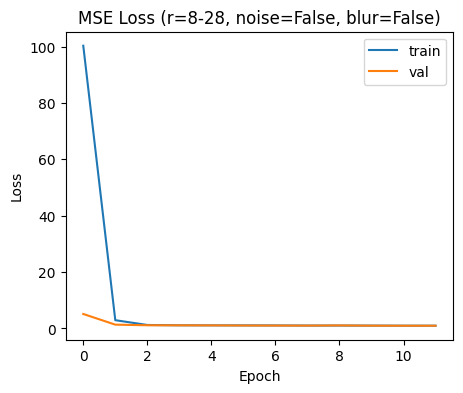

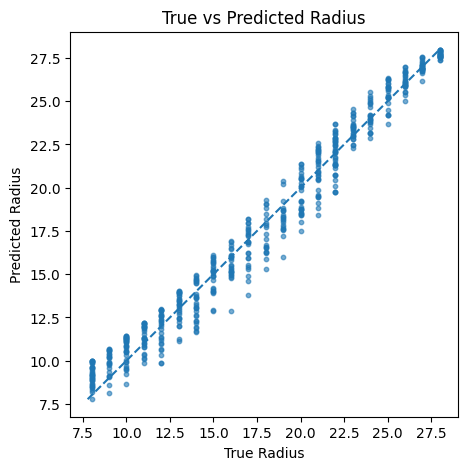

MAE = 0.787 | RMSE = 0.976 | R² = 0.975

=== [Eksperimen 2] Tambahkan Gaussian Noise ===
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


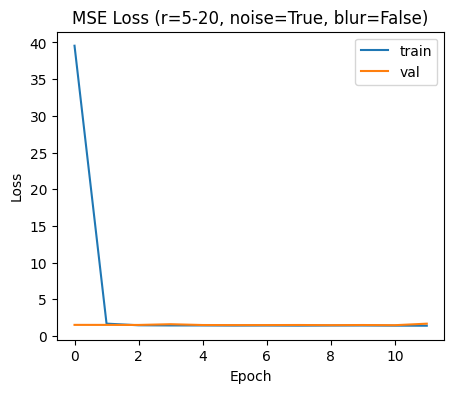

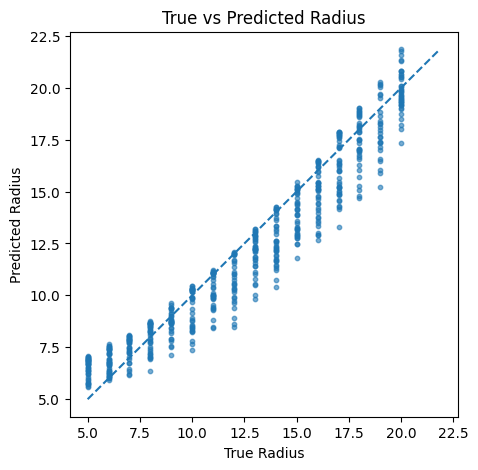

MAE = 1.022 | RMSE = 1.299 | R² = 0.922

=== [Eksperimen 2B] Tambahkan Gaussian Blur ===
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


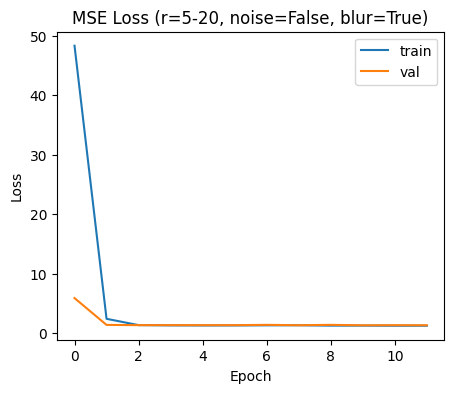

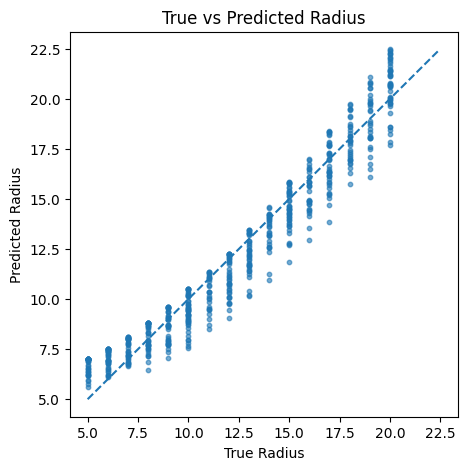

MAE = 0.927 | RMSE = 1.144 | R² = 0.939

=== [Eksperimen 3] Multi-Output Regression: [r, cx, cy] ===
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
MAE → radius=0.94, cx=9.17, cy=9.48
RMSE → radius=1.11, cx=11.10, cy=11.32
R² → radius=0.942, cx=-0.002, cy=-0.025


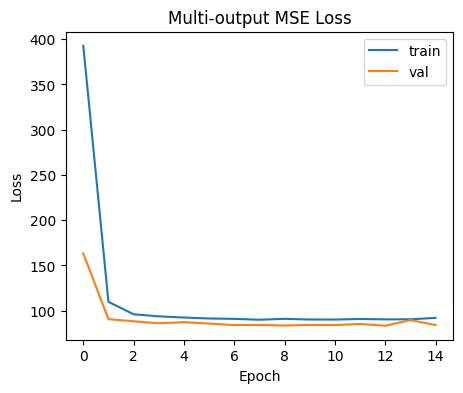

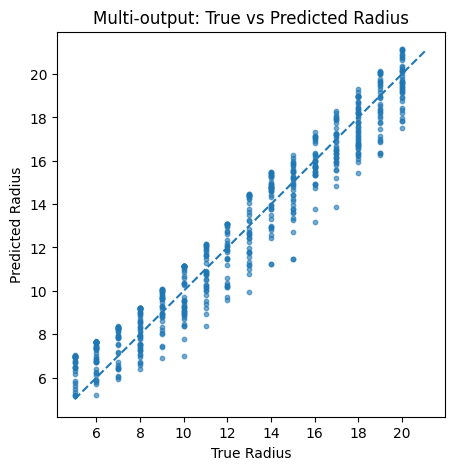

In [ ]:
# ============================================================
# 📦 IMPORT LIBRARIES
# ============================================================
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, models

# ============================================================
# 🧩 FUNCTION: DATA GENERATOR DASAR
# ============================================================
def make_sample(img_size=64, min_r=5, max_r=20, noise=False, blur=False):
    r = np.random.randint(min_r, max_r + 1)
    img = np.zeros((img_size, img_size), dtype=np.uint8)
    cx = np.random.randint(r, img_size - r)
    cy = np.random.randint(r, img_size - r)
    cv2.circle(img, (cx, cy), r, 255, -1)

    # Optional noise
    if noise:
        noise_img = np.random.normal(0, 25, img.shape)
        img = np.clip(img + noise_img, 0, 255)

    # Optional blur
    if blur:
        img = cv2.GaussianBlur(img, (5, 5), 1)

    img = (img / 255.0).astype(np.float32)
    img3 = np.stack([img, img, img], axis=-1)
    return img3, float(r), (cx, cy)

# ============================================================
# ⚙️ FUNCTION: TRAIN & EVALUATE CNN UNTUK REGRESI
# ============================================================
def train_and_evaluate(min_r=5, max_r=20, noise=False, blur=False):
    N = 3000
    X, y, _ = zip(*[make_sample(min_r=min_r, max_r=max_r, noise=noise, blur=blur) for _ in range(N)])
    X = np.array(X, dtype=np.float32)
    y = np.array(y, dtype=np.float32)

    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

    model = models.Sequential([
        layers.Input((64, 64, 3)),
        layers.Conv2D(32, 3, activation='relu'), layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation='relu'), layers.MaxPooling2D(),
        layers.Conv2D(128, 3, activation='relu'), layers.GlobalAveragePooling2D(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    history = model.fit(Xtr, ytr, validation_data=(Xte, yte), epochs=12, batch_size=64, verbose=0)

    y_pred = model.predict(Xte).ravel()
    mae = mean_absolute_error(yte, y_pred)
    rmse = float(np.sqrt(np.mean((yte - y_pred) ** 2)))
    r2 = r2_score(yte, y_pred)

    # Plot Loss
    plt.figure(figsize=(5, 4))
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title(f"MSE Loss (r={min_r}-{max_r}, noise={noise}, blur={blur})")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    # Plot Scatter
    plt.figure(figsize=(5, 5))
    plt.scatter(yte, y_pred, s=10, alpha=0.6)
    lims = [min(yte.min(), y_pred.min()), max(yte.max(), y_pred.max())]
    plt.plot(lims, lims, '--')
    plt.xlabel("True Radius")
    plt.ylabel("Predicted Radius")
    plt.title("True vs Predicted Radius")
    plt.show()

    print(f"MAE = {mae:.3f} | RMSE = {rmse:.3f} | R² = {r2:.3f}")
    return mae, rmse, r2

# ============================================================
# 🧠 EXPERIMENT 1: UBAH RENTANG RADIUS (8–28)
# ============================================================
print("=== [Eksperimen 1] Radius Lebih Lebar (8–28) ===")
mae1, rmse1, r21 = train_and_evaluate(min_r=8, max_r=28)

# ============================================================
# 🧠 EXPERIMENT 2: TAMBAH NOISE & BLUR
# ============================================================
print("\n=== [Eksperimen 2] Tambahkan Gaussian Noise ===")
mae2, rmse2, r22 = train_and_evaluate(noise=True)

print("\n=== [Eksperimen 2B] Tambahkan Gaussian Blur ===")
mae3, rmse3, r23 = train_and_evaluate(blur=True)

# ============================================================
# 🧠 EXPERIMENT 3: MULTI-OUTPUT REGRESSION [r, cx, cy]
# ============================================================
print("\n=== [Eksperimen 3] Multi-Output Regression: [r, cx, cy] ===")

# Dataset multi-output
N = 3000
X, y_tuple, _ = zip(*[make_sample() for _ in range(N)])
X = np.array(X, dtype=np.float32)
# Reshape y to be (N, 3) for multi-output
y = np.array(y_tuple, dtype=np.float32).reshape(-1, 1) # Reshape radius
# Get cx and cy and stack them with radius
_, _, C = zip(*[make_sample() for _ in range(N)])
C = np.array(C, dtype=np.float32)
y = np.hstack((y, C))


Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

# Model multi-output
model = models.Sequential([
    layers.Input((64, 64, 3)),
    layers.Conv2D(32, 3, activation='relu'), layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'), layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'), layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3)  # Output: [r, cx, cy]
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(Xtr, ytr, validation_data=(Xte, yte), epochs=15, batch_size=64, verbose=0)

y_pred = model.predict(Xte)
mae = np.mean(np.abs(y_pred - yte), axis=0)
rmse = np.sqrt(np.mean((y_pred - yte) ** 2, axis=0))
r2_r = r2_score(yte[:, 0], y_pred[:, 0])
r2_cx = r2_score(yte[:, 1], y_pred[:, 1])
r2_cy = r2_score(yte[:, 2], y_pred[:, 2])

print(f"MAE → radius={mae[0]:.2f}, cx={mae[1]:.2f}, cy={mae[2]:.2f}")
print(f"RMSE → radius={rmse[0]:.2f}, cx={rmse[1]:.2f}, cy={rmse[2]:.2f}")
print(f"R² → radius={r2_r:.3f}, cx={r2_cx:.3f}, cy={r2_cy:.3f}")

# Visualisasi per dimensi
plt.figure(figsize=(5, 4))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("Multi-output MSE Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Scatter radius vs prediksi
plt.figure(figsize=(5, 5))
plt.scatter(yte[:, 0], y_pred[:, 0], s=10, alpha=0.6)
lims = [min(yte[:, 0].min(), y_pred[:, 0].min()), max(yte[:, 0].max(), y_pred[:, 0].max())]
plt.plot(lims, lims, '--')
plt.xlabel("True Radius")
plt.ylabel("Predicted Radius")
plt.title("Multi-output: True vs Predicted Radius")
plt.show()

## Praktikum D2 - Menebak Umur Manusia dari Foto Wajah (UTKFace)

### Langkah 1 - Membuat Akun Kaggle dan Mengunduh kaggle.json

Ikuti langkah berikut:
1. Buka situs https://www.kaggle.com
2. Daftar menggunakan email Google atau GitHub.
3. Setelah login, klik profil di kanan atas → pilih “Account”.
4. Gulir ke bawah ke bagian API → klik “Create New API Token”.
5. File bernama kaggle.json akan otomatis terunduh ke komputer Anda.
File ini berisi API key pribadi agar Colab bisa mengakses dataset Kaggle Anda.

### Langkah 2 - Mengunggah kaggle.json ke Colab

In [ ]:
# Jalankan ini di awal notebook
from google.colab import files
files.upload() # pilih file kaggle.json dari komputer Anda

In [ ]:
import os, shutil
if os.path.exists("kaggle.json"):
  os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
  shutil.copy("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))
  os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)
  !pip -q install kaggle
  print("✅ Kaggle API siap digunakan.")
else:
  print("kaggle.json belum ditemukan. Upload terlebih dahulu.")

✅ Kaggle API siap digunakan.


### Langkah 3 - Mengunduh Dataset UTKFace dari Kaggle

In [ ]:
# Unduh dataset UTKFace (sekali saja)
!kaggle datasets download -d jangedoo/utkface-new -p /content -q
!unzip -q /content/utkface-new.zip -d /content/utk
print("✅ Dataset UTKFace berhasil diekstrak.")

Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors
✅ Dataset UTKFace berhasil diekstrak.


### Langkah 4 - Menampilkan Contoh Gambar Dataset

Total gambar ditemukan: 23708


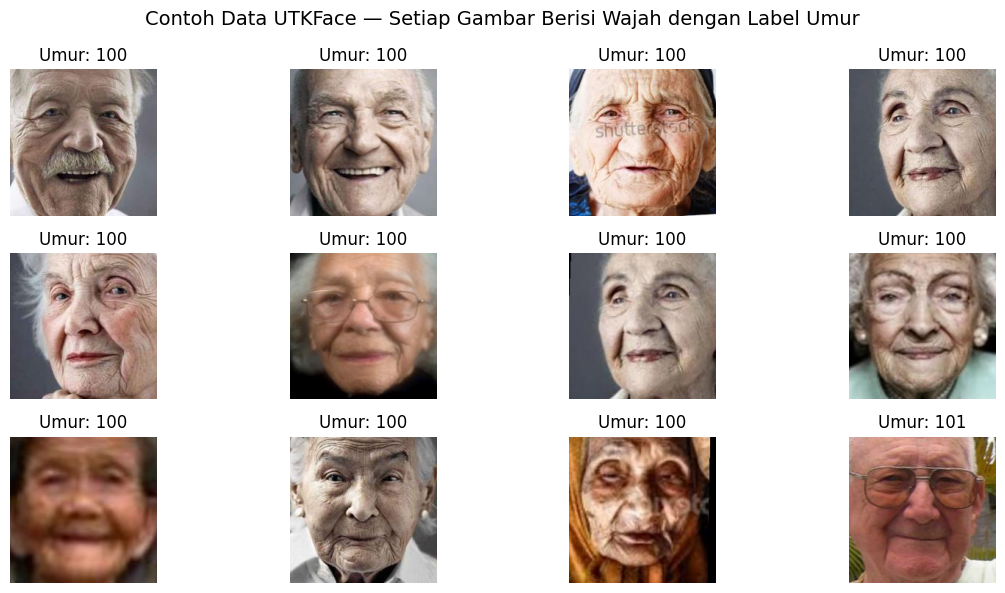

In [ ]:
import matplotlib.pyplot as plt
import os, glob
from PIL import Image
# Ambil 12 gambar acak dari dataset
files = glob.glob("/content/utk/UTKFace/*.jpg")
files = sorted(files)
print(f"Total gambar ditemukan: {len(files)}")
plt.figure(figsize=(12, 6))
for i, f in enumerate(files[:12]):
    # Ambil umur dari nama file
    age = int(os.path.basename(f).split("_")[0])
    img = Image.open(f)
    plt.subplot(3, 4, i + 1)
    plt.imshow(img)
    plt.title(f"Umur: {age}")
    plt.axis("off")
plt.suptitle("Contoh Data UTKFace — Setiap Gambar Berisi Wajah dengan Label Umur", fontsize=14)
plt.tight_layout()
plt.show()

### Langkah 5 - Siapkan Dataset untuk Model

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

def parse_age_from_name(fp):
    return int(os.path.basename(fp).split('_')[0])

ages = np.array([parse_age_from_name(f) for f in files], dtype=np.float32)
train_files, test_files, y_train, y_test = train_test_split(
    files, ages, test_size=0.2, random_state=42
)

IMG_SIZE = 160
def load_img(fp, label):
    img = tf.io.read_file(fp)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    return img / 255.0, label

train_ds = tf.data.Dataset.from_tensor_slices((train_files,
y_train)).map(load_img).batch(64)
test_ds = tf.data.Dataset.from_tensor_slices((test_files,
y_test)).map(load_img).batch(64)

print("✅ Dataset siap dilatih.")

✅ Dataset siap dilatih.


### Langkah 6 - Membangun Model dengan Transfer Learning

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Gunakan GPU jika tersedia
print("Hardware:", "GPU" if tf.config.list_physical_devices('GPU') else
"CPU")

# Buat arsitektur model
base_model = tf.keras.applications.MobileNetV2(
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    weights='imagenet'
)
base_model.trainable = False  # tahap awal: freeze backbone

# Tambahkan head regresi
inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs * 255.0)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(1)(x)  # output tunggal: umur
model = tf.keras.Model(inputs, outputs)

# Kompilasi model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss='mse', metrics=['mae'])

model.summary()

Hardware: GPU
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multiply (Multiply)             │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_13     │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

### Langkah 7 - Melatih Model (Tahap 1 - Frozen)

Epoch 1/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 38s 129ms/step - loss: 159.0669 - mae: 9.4350 - val_loss: 149.2166 - val_mae: 9.2449 - learning_rate: 0.0010
Epoch 2/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - loss: 147.6587 - mae: 8.9855 - val_loss: 140.6549 - val_mae: 8.8040 - learning_rate: 0.0010
Epoch 3/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - loss: 141.2217 - mae: 8.7303 - val_loss: 140.2130 - val_mae: 8.8376 - learning_rate: 0.0010
Epoch 4/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - loss: 138.4961 - mae: 8.6913 - val_loss: 138.8436 - val_mae: 8.7557 - learning_rate: 0.0010
Epoch 5/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - loss: 136.6788 - mae: 8.5553 - val_loss: 136.8728 - val_mae: 8.6995 - learning_rate: 0.0010
Epoch 6/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - loss: 133.4452 - mae: 8.4793 - val_loss: 137.0339 - val_mae: 8.7013 - learning_rate: 0.0010
Epoch 7/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - loss: 133.6886 - mae: 8.4489 - val_loss: 134.8892 - val

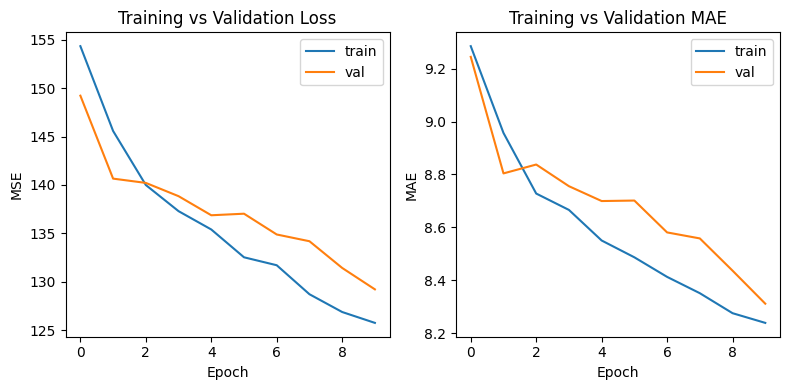

In [ ]:
# Callback untuk pelatihan yang lebih stabil
cb = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True,
                                     monitor='val_loss'),
    tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.5, min_lr=1e-5,
                                         monitor='val_loss')
]

history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10,
    callbacks=cb,
    verbose=1
)

# Visualisasi perubahan loss dan MAE selama pelatihan:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epoch'); plt.ylabel('MSE'); plt.title('Training vs Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='val')
plt.xlabel('Epoch'); plt.ylabel('MAE')
plt.title('Training vs Validation MAE')
plt.legend()
plt.tight_layout()
plt.show()

### Langkah 8 - Fine-tuning Backbone (Tahap 2)

Epoch 1/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 45s 96ms/step - loss: 194.2818 - mae: 10.2746 - val_loss: 141.3539 - val_mae: 9.1008 - learning_rate: 1.0000e-04
Epoch 2/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - loss: 79.2339 - mae: 6.6502 - val_loss: 127.3989 - val_mae: 8.7623 - learning_rate: 1.0000e-04
Epoch 3/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - loss: 52.8822 - mae: 5.4677 - val_loss: 116.3821 - val_mae: 8.1749 - learning_rate: 1.0000e-04
Epoch 4/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - loss: 39.0739 - mae: 4.7554 - val_loss: 117.0813 - val_mae: 8.1635 - learning_rate: 1.0000e-04
Epoch 5/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - loss: 30.6921 - mae: 4.2111 - val_loss: 103.4543 - val_mae: 7.4860 - learning_rate: 1.0000e-04


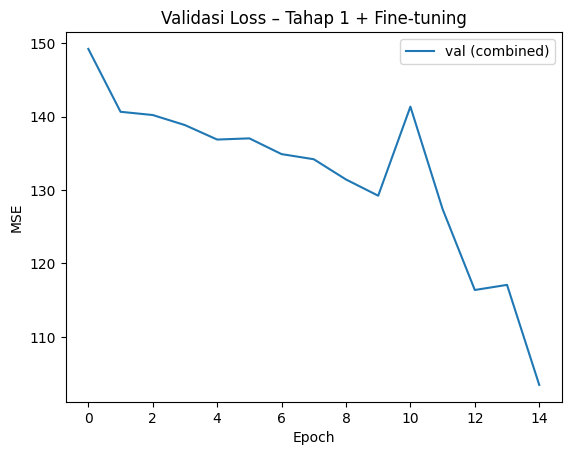

In [ ]:
# Aktifkan kembali sebagian layer terakhir untuk fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False  # beku sebagian besar layer

# Recompile dengan learning rate lebih kecil
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss='mse', metrics=['mae'])

history_ft = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=5,
    callbacks=cb,
    verbose=1
)

# Visualisasi gabungan training dan fine-tuning:
plt.plot(history.history['val_loss'] + history_ft.history['val_loss'],
label='val (combined)')
plt.title("Validasi Loss – Tahap 1 + Fine-tuning")
plt.xlabel("Epoch"); plt.ylabel("MSE")
plt.legend(); plt.show()

### Langkah 9 - Evaluasi Akhir (MAE, RMSE, R²)

MAE  = 7.49 tahun
RMSE = 10.17 tahun
R²   = 0.739


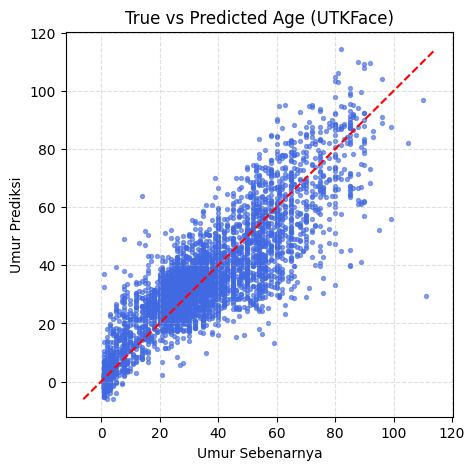

In [ ]:
from math import sqrt

y_pred = np.concatenate([model.predict(batch[0], verbose=0).ravel() for batch in test_ds])
mae  = mean_absolute_error(y_test, y_pred)
rmse = sqrt(np.mean((y_test - y_pred)**2))
r2   = r2_score(y_test, y_pred)

print(f"MAE  = {mae:.2f} tahun")
print(f"RMSE = {rmse:.2f} tahun")
print(f"R²   = {r2:.3f}")

# Plot “umur sebenarnya vs umur prediksi”:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, s=8, alpha=0.6, color='royalblue')
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, '--', color='red')
plt.xlabel("Umur Sebenarnya")
plt.ylabel("Umur Prediksi")
plt.title("True vs Predicted Age (UTKFace)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

### Langkah 10 - Melihat Contoh Prediksi Nyata

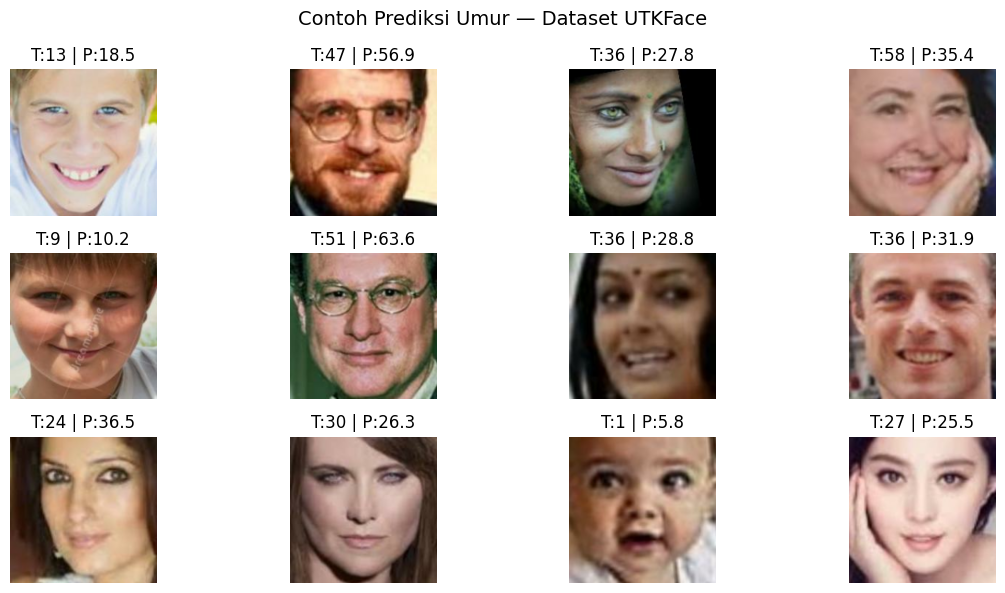

In [ ]:
import random
sample_paths = random.sample(test_files, 12)

plt.figure(figsize=(12,6))
for i, path in enumerate(sample_paths):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))/255.0
  true_age = int(os.path.basename(path).split('_')[0])
  pred_age = model.predict(tf.expand_dims(img, 0), verbose=0).ravel()[0]
  plt.subplot(3,4,i+1)
  plt.imshow(img.numpy())
  plt.title(f"T:{true_age} | P:{pred_age:.1f}")
  plt.axis('off')
plt.suptitle("Contoh Prediksi Umur — Dataset UTKFace", fontsize=14)
plt.tight_layout()
plt.show()

### Tantangan Mini

1. Tambahkan data augmentation ekstra (kontras, brightness, zoom).
→ Bagaimana pengaruhnya pada MAE?
2. Ubah learning rate schedule atau optimizer.
→ Apakah model lebih stabil?
3. Pisahkan dataset per kelompok umur (0–10, 11–20, dst).
→ Mana kelompok dengan error terbesar?
4. Uji model Anda pada wajah sendiri (setelah resize).
→ Apakah prediksinya realistis?

Total gambar ditemukan: 23708

🧩 BAGIAN 1: DATA AUGMENTATION EKSTRA
Training dengan augmentasi data...
Epoch 1/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 162s 516ms/step - loss: 494.0289 - mae: 16.9199 - val_loss: 277.6837 - val_mae: 12.8269
Epoch 2/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 142s 477ms/step - loss: 397.1496 - mae: 15.2591 - val_loss: 245.8466 - val_mae: 12.2410
Epoch 3/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 142s 479ms/step - loss: 392.5125 - mae: 15.1941 - val_loss: 227.8326 - val_mae: 11.3016
Epoch 4/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 142s 477ms/step - loss: 390.7907 - mae: 15.1243 - val_loss: 213.2832 - val_mae: 11.0387
Epoch 5/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 142s 479ms/step - loss: 387.8495 - mae: 15.0846 - val_loss: 232.3212 - val_mae: 12.1562

📊 HASIL BAGIAN 1 — Data Augmentation
MAE  = 12.16 tahun
RMSE = 15.24 tahun
R²   = 0.415


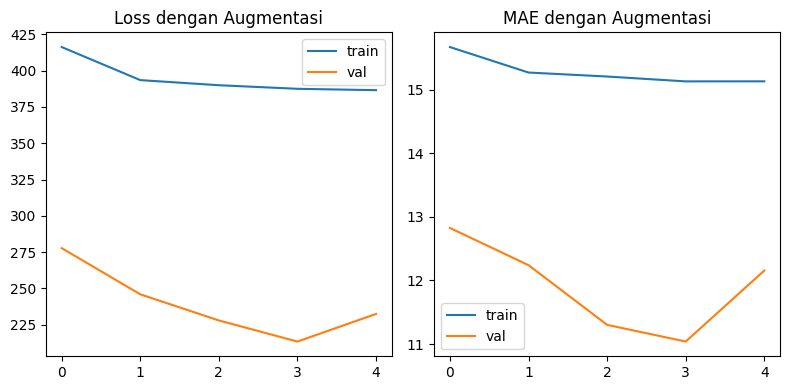


🧠 BAGIAN 2: OPTIMIZER DAN LEARNING RATE SCHEDULE
Training dengan scheduler learning rate...
Epoch 1/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 161s 514ms/step - loss: 386.9923 - mae: 15.0558 - val_loss: 215.0312 - val_mae: 11.4954
Epoch 2/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 144s 486ms/step - loss: 385.4285 - mae: 15.0531 - val_loss: 203.5829 - val_mae: 10.8659
Epoch 3/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 144s 484ms/step - loss: 383.8178 - mae: 15.0244 - val_loss: 224.4898 - val_mae: 12.0563
Epoch 4/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 201s 480ms/step - loss: 384.6797 - mae: 15.0322 - val_loss: 224.3148 - val_mae: 11.9770
Epoch 5/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 140s 472ms/step - loss: 383.7060 - mae: 15.0282 - val_loss: 225.3000 - val_mae: 11.9807

📊 HASIL BAGIAN 2 — Optimizer & LR Schedule
MAE  = 11.98 tahun
RMSE = 15.01 tahun
R²   = 0.432


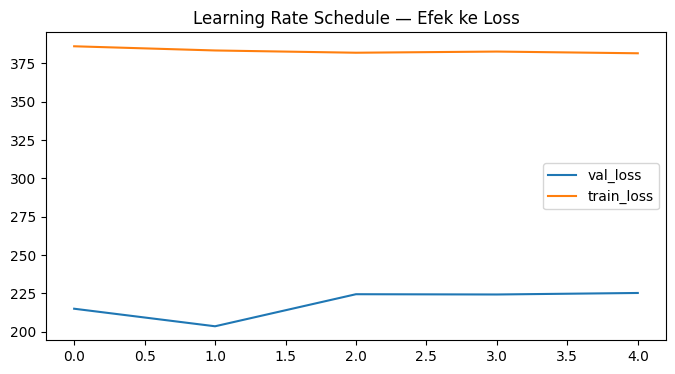


👶 BAGIAN 3: ANALISIS ERROR PER KELOMPOK UMUR


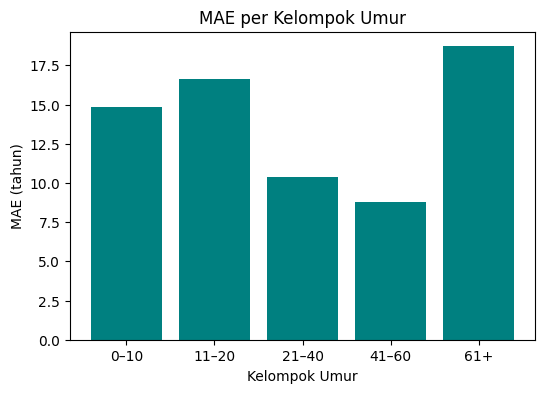


📊 HASIL BAGIAN 3 — Error per Kelompok Umur
0–10    : 14.86 tahun
11–20   : 16.61 tahun
21–40   : 10.37 tahun
41–60   : 8.81 tahun
61+     : 18.71 tahun
❗ Kelompok dengan error terbesar: 61+ (18.71 tahun)

🧍‍♂️ BAGIAN 4: UJI MODEL PADA FOTO WAJAH SENDIRI


Saving maself.jpg to maself.jpg


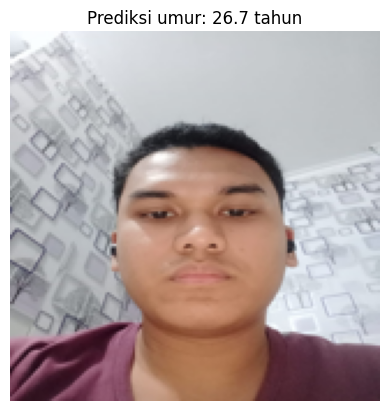

📷 File: maself.jpg → Prediksi umur: 26.7 tahun


In [ ]:
# ============================================
# 📦 SETUP DASAR — IMPORT DAN DATA UTKFACE
# ============================================
import os, glob, random
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from math import sqrt

# Ambil dataset UTKFace
files = glob.glob("/content/utk/UTKFace/*.jpg")
files = sorted(files)
print(f"Total gambar ditemukan: {len(files)}")

def parse_age_from_name(fp):
    return int(os.path.basename(fp).split('_')[0])

ages = np.array([parse_age_from_name(f) for f in files], dtype=np.float32)
train_files, test_files, y_train, y_test = train_test_split(
    files, ages, test_size=0.2, random_state=42
)

IMG_SIZE = 160

def load_img(fp, label):
    img = tf.io.read_file(fp)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    return img / 255.0, label


# ====================================================
# 🧩 BAGIAN 1: DATA AUGMENTATION EKSTRA
# ====================================================
print("\n" + "="*60)
print("🧩 BAGIAN 1: DATA AUGMENTATION EKSTRA")
print("="*60)

from tensorflow.keras import layers

augment = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.15),
    layers.RandomContrast(0.2),
    layers.RandomBrightness(0.2),
    layers.RandomZoom(0.2),
])

def load_img_aug(fp, label):
    img, label = load_img(fp, label)
    return augment(img), label

train_ds_aug = tf.data.Dataset.from_tensor_slices((train_files, y_train)).map(load_img_aug).batch(64)
test_ds = tf.data.Dataset.from_tensor_slices((test_files, y_test)).map(load_img).batch(64)

base_model = tf.keras.applications.MobileNetV2(
    include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet'
)
base_model.trainable = False

inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs * 255.0)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(1)(x)
model_aug = tf.keras.Model(inputs, outputs)

model_aug.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss='mse', metrics=['mae'])
print("Training dengan augmentasi data...")
hist_aug = model_aug.fit(train_ds_aug, validation_data=test_ds, epochs=5, verbose=1)

# --- Output evaluasi bagian 1 ---
y_pred = np.concatenate([model_aug.predict(batch[0], verbose=0).ravel() for batch in test_ds])
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(np.mean((y_test - y_pred)**2))
r2 = r2_score(y_test, y_pred)

print("\n📊 HASIL BAGIAN 1 — Data Augmentation")
print(f"MAE  = {mae:.2f} tahun")
print(f"RMSE = {rmse:.2f} tahun")
print(f"R²   = {r2:.3f}")

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(hist_aug.history['loss'], label='train')
plt.plot(hist_aug.history['val_loss'], label='val')
plt.title("Loss dengan Augmentasi")
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_aug.history['mae'], label='train')
plt.plot(hist_aug.history['val_mae'], label='val')
plt.title("MAE dengan Augmentasi")
plt.legend()
plt.tight_layout()
plt.show()


# ====================================================
# 🧠 BAGIAN 2: OPTIMIZER / LEARNING RATE SCHEDULE
# ====================================================
print("\n" + "="*60)
print("🧠 BAGIAN 2: OPTIMIZER DAN LEARNING RATE SCHEDULE")
print("="*60)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3, decay_steps=200, decay_rate=0.9
)

model_opt = tf.keras.models.clone_model(model_aug)
model_opt.set_weights(model_aug.get_weights())
model_opt.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                  loss='mse', metrics=['mae'])

print("Training dengan scheduler learning rate...")
hist_opt = model_opt.fit(train_ds_aug, validation_data=test_ds, epochs=5, verbose=1)

# --- Output evaluasi bagian 2 ---
y_pred_opt = np.concatenate([model_opt.predict(batch[0], verbose=0).ravel() for batch in test_ds])
mae_opt = mean_absolute_error(y_test, y_pred_opt)
rmse_opt = sqrt(np.mean((y_test - y_pred_opt)**2))
r2_opt = r2_score(y_test, y_pred_opt)

print("\n📊 HASIL BAGIAN 2 — Optimizer & LR Schedule")
print(f"MAE  = {mae_opt:.2f} tahun")
print(f"RMSE = {rmse_opt:.2f} tahun")
print(f"R²   = {r2_opt:.3f}")

plt.figure(figsize=(8,4))
plt.plot(hist_opt.history['val_loss'], label='val_loss')
plt.plot(hist_opt.history['loss'], label='train_loss')
plt.title("Learning Rate Schedule — Efek ke Loss")
plt.legend()
plt.show()


# ====================================================
# 👶 BAGIAN 3: ANALISIS ERROR PER KELOMPOK UMUR
# ====================================================
print("\n" + "="*60)
print("👶 BAGIAN 3: ANALISIS ERROR PER KELOMPOK UMUR")
print("="*60)

groups = {
    "0–10": (0, 10),
    "11–20": (11, 20),
    "21–40": (21, 40),
    "41–60": (41, 60),
    "61+": (61, 116)
}

group_mae = {}
for name, (low, high) in groups.items():
    idx = (y_test >= low) & (y_test <= high)
    if np.sum(idx) > 0:
        group_mae[name] = mean_absolute_error(y_test[idx], y_pred_opt[idx])

plt.figure(figsize=(6,4))
plt.bar(group_mae.keys(), group_mae.values(), color='teal')
plt.title("MAE per Kelompok Umur")
plt.ylabel("MAE (tahun)")
plt.xlabel("Kelompok Umur")
plt.show()

max_group = max(group_mae, key=group_mae.get)
print("\n📊 HASIL BAGIAN 3 — Error per Kelompok Umur")
for k, v in group_mae.items():
    print(f"{k:8s}: {v:.2f} tahun")
print(f"❗ Kelompok dengan error terbesar: {max_group} ({group_mae[max_group]:.2f} tahun)")


# ====================================================
# 🧍‍♂️ BAGIAN 4: UJI MODEL PADA FOTO WAJAH SENDIRI
# ====================================================
print("\n" + "="*60)
print("🧍‍♂️ BAGIAN 4: UJI MODEL PADA FOTO WAJAH SENDIRI")
print("="*60)

from google.colab import files
uploaded = files.upload()

for fname in uploaded.keys():
    img_path = fname
    img = Image.open(img_path).convert("RGB")
    img_resized = img.resize((IMG_SIZE, IMG_SIZE))
    img_arr = np.array(img_resized) / 255.0
    pred = model_opt.predict(tf.expand_dims(img_arr, 0), verbose=0).ravel()[0]

    plt.imshow(img_resized)
    plt.title(f"Prediksi umur: {pred:.1f} tahun")
    plt.axis("off")
    plt.show()

    print(f"📷 File: {fname} → Prediksi umur: {pred:.1f} tahun")


## Praktikum D3 - Menilai "Kepopuleran Hewan Peliharaan" dari Foto

### Langkah 1 - Menyiapkan Kaggle API

In [1]:
from google.colab import files
files.upload()  # pilih kaggle.json dari komputer Anda
import os, shutil
if os.path.exists("kaggle.json"):
    os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
    shutil.copy("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))
    os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)
    !pip -q install kaggle
    print("✅ Kaggle API siap digunakan.")
else:
    print("    kaggle.json belum ditemukan. Upload terlebih dahulu.")

Saving kaggle.json to kaggle.json
✅ Kaggle API siap digunakan.


### Langkah 2 - Mengunduh dan Mengekstrak Dataset

In [2]:
# Unduh dataset Pawpularity (sekitar 800MB)
!kaggle competitions download -c petfinder-pawpularity-score -p /content -q
!unzip -q /content/petfinder-pawpularity-score.zip -d /content/paw
print("✅ Dataset Pawpularity berhasil diekstrak.")

✅ Dataset Pawpularity berhasil diekstrak.


### Langkah 3 - Melihat Contoh Data

                                 Id  Subject Focus  Eyes  Face  Near  Action  \
0  0007de18844b0dbbb5e1f607da0606e0              0     1     1     1       0   
1  0009c66b9439883ba2750fb825e1d7db              0     1     1     0       0   
2  0013fd999caf9a3efe1352ca1b0d937e              0     1     1     1       0   
3  0018df346ac9c1d8413cfcc888ca8246              0     1     1     1       0   
4  001dc955e10590d3ca4673f034feeef2              0     0     0     1       0   

   Accessory  Group  Collage  Human  Occlusion  Info  Blur  Pawpularity  \
0          0      1        0      0          0     0     0           63   
1          0      0        0      0          0     0     0           42   
2          0      0        0      1          1     0     0           28   
3          0      0        0      0          0     0     0           15   
4          0      1        0      0          0     0     0           72   

                                                path  
0  /content/p

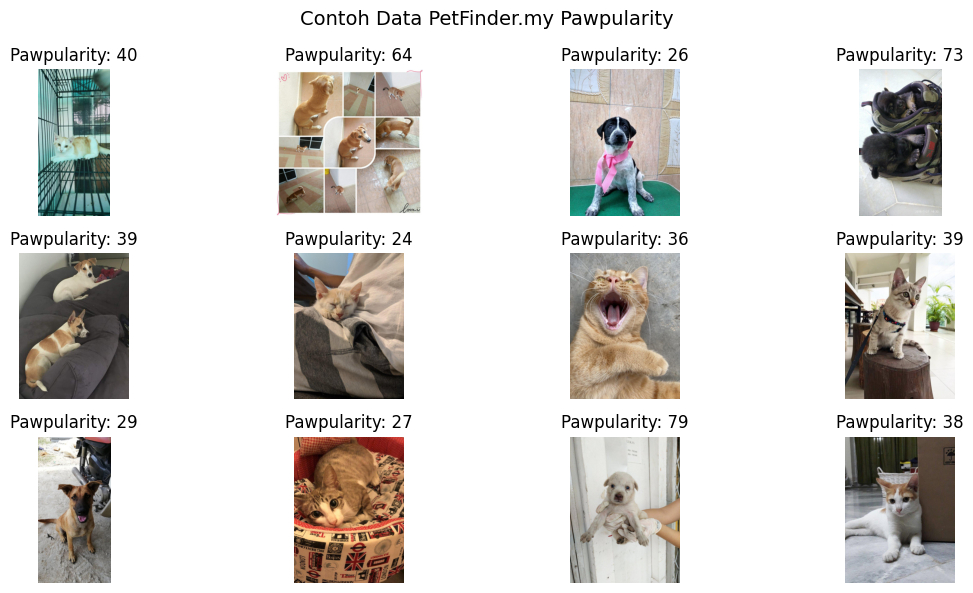

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

# Muat CSV
df = pd.read_csv('/content/paw/train.csv')
df['path'] = df['Id'].apply(lambda x: f"/content/paw/train/{x}.jpg")
print(df.head())

# Tampilkan 12 contoh gambar
plt.figure(figsize=(12, 6))
for i, row in enumerate(df.sample(12, random_state=42).itertuples()):
    img = Image.open(row.path)
    plt.subplot(3, 4, i + 1)
    plt.imshow(img)
    plt.title(f"Pawpularity: {row.Pawpularity}")
    plt.axis('off')
plt.suptitle("Contoh Data PetFinder.my Pawpularity", fontsize=14)
plt.tight_layout()
plt.show()


### Langkah 4 - Persiapan Dataset

In [8]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

IMG_SIZE = 224
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

def load_image(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    img = tf.cast(img, tf.float32) / 255.0
    return img, tf.cast(label, tf.float32)

train_ds = tf.data.Dataset.from_tensor_slices((train_df['path'],
train_df['Pawpularity']))\
    .map(load_image, num_parallel_calls=tf.data.AUTOTUNE)\
    .shuffle(4096).batch(64).prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((val_df['path'],
val_df['Pawpularity']))\
    .map(load_image, num_parallel_calls=tf.data.AUTOTUNE)\
    .batch(64).prefetch(tf.data.AUTOTUNE)

print(f"Dataset siap digunakan — {len(train_df)} untuk training, {len(val_df)} untuk validasi.")

Dataset siap digunakan — 7929 untuk training, 1983 untuk validasi.


### Langkah 4 - Membangun Model (EfficientNetB0)

In [9]:
from tensorflow.keras import layers, models

base = tf.keras.applications.EfficientNetB0(
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    weights='imagenet'
)
base.trainable = False  # freeze sementara

inputs = tf.keras.Input((IMG_SIZE, IMG_SIZE, 3))
x = tf.keras.applications.efficientnet.preprocess_input(inputs * 255.0)
x = base(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(1)(x)

model = tf.keras.Model(inputs, outputs)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multiply (Multiply)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,377,764 (16.70 MB)

 Trainable params: 328,193 (1.25 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

### Langkah 5 - Melatih Model

In [10]:
cb = [
    tf.keras.callbacks.EarlyStopping(patience=3,
restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.5)
]

history = model.fit(train_ds, validation_data=val_ds, epochs=10,
callbacks=cb, verbose=1)

Epoch 1/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 141s 724ms/step - loss: 830.3813 - mae: 21.7595 - val_loss: 477.7316 - val_mae: 16.1928 - learning_rate: 0.0010
Epoch 2/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 45s 250ms/step - loss: 429.4476 - mae: 15.3503 - val_loss: 430.1267 - val_mae: 15.5638 - learning_rate: 0.0010
Epoch 3/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 76s 210ms/step - loss: 389.4857 - mae: 14.6051 - val_loss: 407.7568 - val_mae: 15.0491 - learning_rate: 0.0010
Epoch 4/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 42s 234ms/step - loss: 372.7933 - mae: 14.3171 - val_loss: 388.5707 - val_mae: 14.5652 - learning_rate: 0.0010
Epoch 5/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 43s 237ms/step - loss: 357.5297 - mae: 14.0918 - val_loss: 384.8772 - val_mae: 14.5690 - learning_rate: 0.0010
Epoch 6/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 92s 297ms/step - loss: 357.2359 - mae: 14.0415 - val_loss: 372.6108 - val_mae: 14.3529 - learning_rate: 0.0010
Epoch 7/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 70s 223ms/step - loss: 336.1059 - mae: 13.6753 - val_

### Langkah 6 - Melihat Proses Belajar

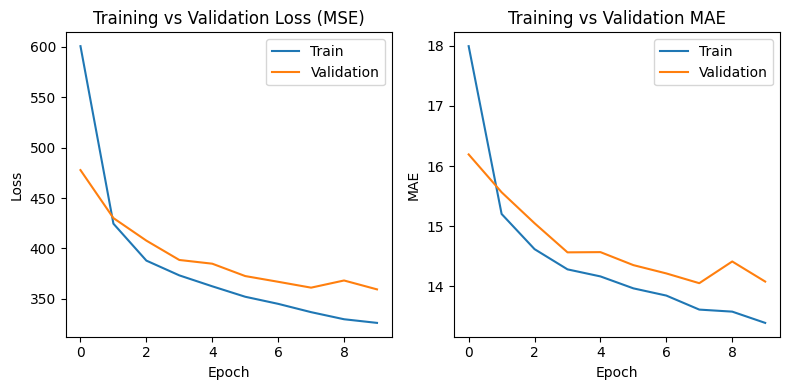

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Training vs Validation Loss (MSE)")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Train')
plt.plot(history.history['val_mae'], label='Validation')
plt.title("Training vs Validation MAE")
plt.xlabel("Epoch"); plt.ylabel("MAE"); plt.legend()
plt.tight_layout()
plt.show()

### Langkah 7 - Evaluasi Model

MAE  = 14.08
RMSE = 18.96
R²   = 0.187


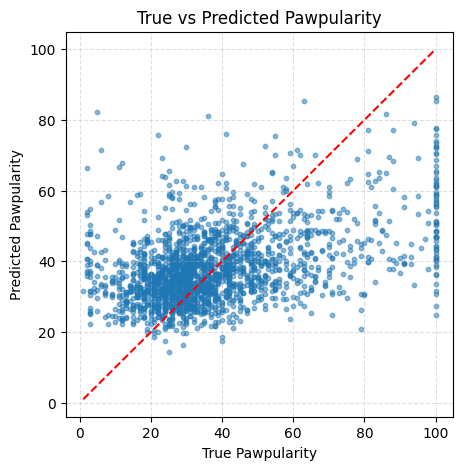

In [12]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
from math import sqrt
y_true = val_df['Pawpularity'].values.astype(np.float32)
y_pred = np.concatenate([model.predict(batch[0], verbose=0).ravel() for
batch in val_ds])
mae = mean_absolute_error(y_true, y_pred)
rmse = sqrt(np.mean((y_true - y_pred)**2))
r2 = r2_score(y_true, y_pred)
print(f"MAE  = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.3f}")
# Plot hasil prediksi vs nilai sebenarnya:
plt.figure(figsize=(5,5))
plt.scatter(y_true, y_pred, s=10, alpha=0.5)
lims = [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())]
plt.plot(lims, lims, '--', color='red')
plt.xlabel("True Pawpularity")
plt.ylabel("Predicted Pawpularity")
plt.title("True vs Predicted Pawpularity")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

### Langkah 8 - Melihat Contoh Prediksi

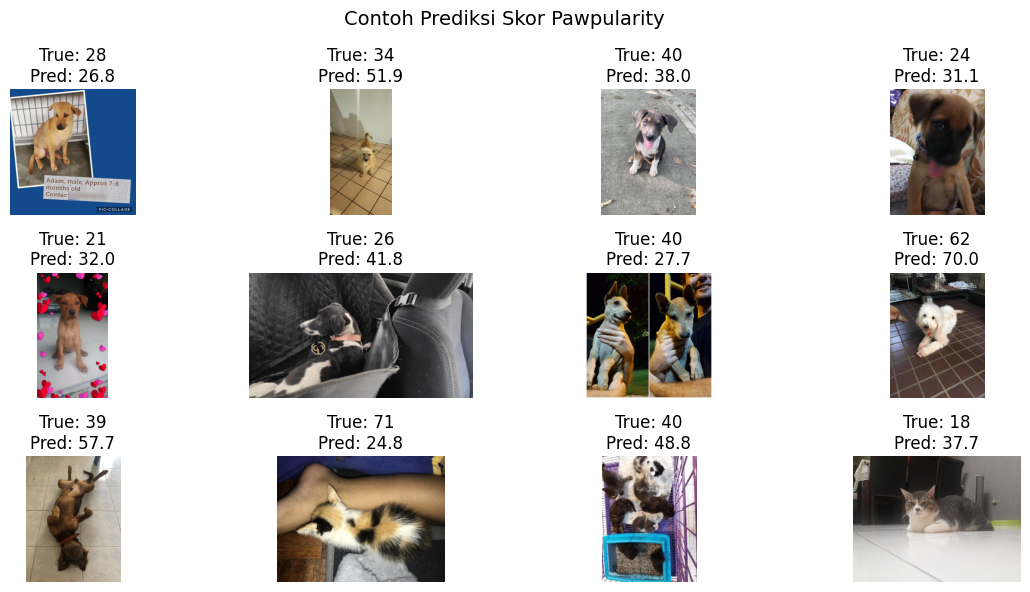

In [13]:
import random
from PIL import Image
sample_rows = val_df.sample(12, random_state=1)
plt.figure(figsize=(12,6))
for i, row in enumerate(sample_rows.itertuples()):
  img = Image.open(row.path)
  pred = model.predict(tf.expand_dims(load_image(row.path, row.Pawpularity)[0], 0), verbose=0).ravel()[0]
  plt.subplot(3,4,i+1)
  plt.imshow(img)
  plt.title(f"True: {row.Pawpularity}\nPred: {pred:.1f}")
  plt.axis('off')
plt.suptitle("Contoh Prediksi Skor Pawpularity", fontsize=14)
plt.tight_layout()
plt.show()

### Tantangan Mini

1. Coba tambahkan *data augmentation* agar model tidak bosan dengan pola yang sama

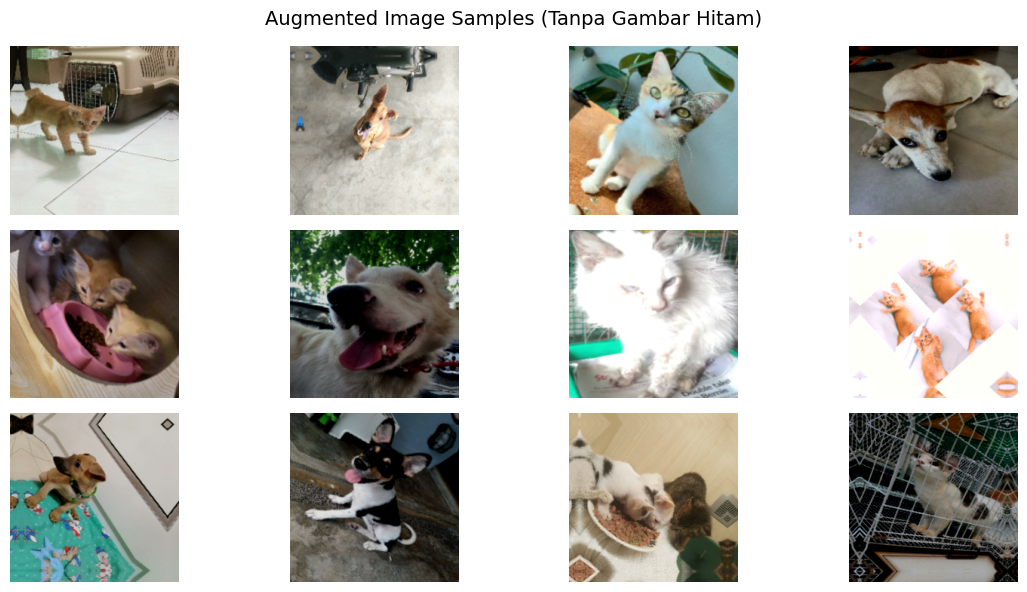

In [17]:
# ====================================================
# 🧩 1️⃣ Data Augmentation — Random Flip, Rotation, Zoom
# ====================================================
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Pipeline Augmentasi Gambar (bekerja di skala 0–255)
augment = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.15),
    layers.RandomZoom(0.2),
    layers.RandomBrightness(0.2),
], name="data_augmentation")

def load_image_aug(path, label):
    # Baca dan ubah ukuran gambar
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))

    # Terapkan augmentasi dulu (di skala 0–255)
    img = tf.cast(img, tf.float32)
    img = augment(img)

    # Pastikan nilai piksel tetap valid [0, 255]
    img = tf.clip_by_value(img, 0.0, 255.0)

    # Normalisasi ke [0, 1]
    img = img / 255.0

    return img, tf.cast(label, tf.float32)

# Buat dataset dengan augmentasi
train_ds_aug = (
    tf.data.Dataset.from_tensor_slices((train_df['path'], train_df['Pawpularity']))
    .map(load_image_aug, num_parallel_calls=tf.data.AUTOTUNE)
    .shuffle(4096)
    .batch(64)
    .prefetch(tf.data.AUTOTUNE)
)

# 🔍 Tampilkan beberapa contoh hasil augmentasi
sample_imgs = next(iter(train_ds_aug.take(1)))[0]

plt.figure(figsize=(12, 6))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(sample_imgs[i].numpy())
    plt.axis('off')
plt.suptitle("Augmented Image Samples (Tanpa Gambar Hitam)", fontsize=14)
plt.tight_layout()
plt.show()


2. Gunakan EfficientNetB3 atau ResNet50, lalu bandingkan hasilnya.

Epoch 1/5
124/124 ━━━━━━━━━━━━━━━━━━━━ 235s 1s/step - loss: 898.1920 - mae: 22.6345 - val_loss: 521.7916 - val_mae: 16.3340
Epoch 2/5
124/124 ━━━━━━━━━━━━━━━━━━━━ 131s 612ms/step - loss: 474.3006 - mae: 16.1607 - val_loss: 445.1563 - val_mae: 15.3266
Epoch 3/5
124/124 ━━━━━━━━━━━━━━━━━━━━ 132s 614ms/step - loss: 410.2533 - mae: 15.3104 - val_loss: 407.7809 - val_mae: 14.8574
Epoch 4/5
124/124 ━━━━━━━━━━━━━━━━━━━━ 130s 609ms/step - loss: 398.8282 - mae: 15.1306 - val_loss: 394.1483 - val_mae: 14.4249
Epoch 5/5
124/124 ━━━━━━━━━━━━━━━━━━━━ 132s 616ms/step - loss: 378.4332 - mae: 14.4529 - val_loss: 379.9079 - val_mae: 14.3432
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
124/124 ━━━━━━━━━━━━━━━━━━━━ 174s 811ms/step - loss: 569.9556 - mae: 17.9208 - val_loss: 417.2751 - val_mae: 15.6804
Epoch 2/5
124/124 ━━━━━━━━━━━━━━━━━━━━ 136s 655ms/step - loss: 390.8976 - mae: 14.7002 - val_loss: 391.9510 - val_mae: 14.8327
Epoch 3/5
124/124 ━━━━━━━━━━━━━━━━━━━━ 159s 699ms/step - loss: 

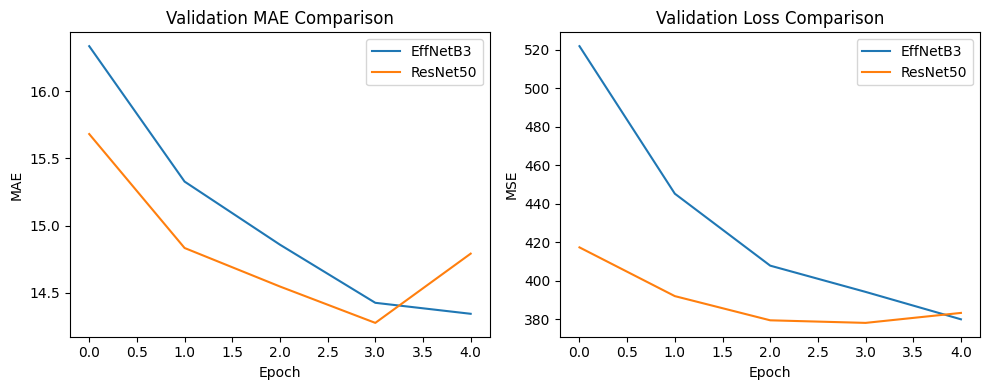

In [18]:
# ====================================================
# 🧩 2️⃣ EfficientNetB3 vs ResNet50
# ====================================================
from tensorflow.keras.applications import EfficientNetB3, ResNet50

def build_model(backbone='efficientnetb3'):
    if backbone == 'efficientnetb3':
        base = EfficientNetB3(include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet')
        preprocess = tf.keras.applications.efficientnet.preprocess_input
    else:
        base = ResNet50(include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet')
        preprocess = tf.keras.applications.resnet.preprocess_input

    base.trainable = False
    inputs = tf.keras.Input((IMG_SIZE, IMG_SIZE, 3))
    x = preprocess(inputs * 255.0)
    x = base(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(256, activation='relu')(x)
    outputs = layers.Dense(1)(x)
    model = tf.keras.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Train EfficientNetB3
model_b3 = build_model('efficientnetb3')
history_b3 = model_b3.fit(train_ds_aug, validation_data=val_ds, epochs=5, verbose=1)

# Train ResNet50
model_res = build_model('resnet')
history_res = model_res.fit(train_ds_aug, validation_data=val_ds, epochs=5, verbose=1)

# 🔍 Output: bandingkan performa
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history_b3.history['val_mae'], label='EffNetB3')
plt.plot(history_res.history['val_mae'], label='ResNet50')
plt.title("Validation MAE Comparison")
plt.xlabel("Epoch"); plt.ylabel("MAE"); plt.legend()

plt.subplot(1,2,2)
plt.plot(history_b3.history['val_loss'], label='EffNetB3')
plt.plot(history_res.history['val_loss'], label='ResNet50')
plt.title("Validation Loss Comparison")
plt.xlabel("Epoch"); plt.ylabel("MSE"); plt.legend()
plt.tight_layout()
plt.show()


3. Buat eksperimen kecil: pisahkan anjing vs kucing — apakah model bias ke salah satu
spesies?

🐶 Dog MAE: 14.23
🐱 Cat MAE: 14.60


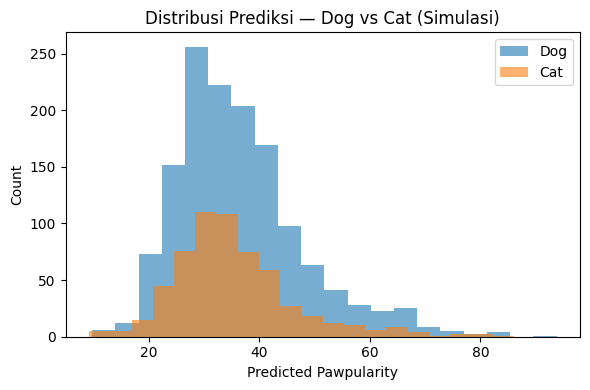

In [21]:
# ====================================================
# 🧩 3️⃣ Eksperimen Bias — Anjing vs Kucing
# ====================================================
# Asumsi: nama file mengandung "dog" atau "cat" - INI TIDAK BENAR untuk dataset ini.
# Kita akan simulasikan adanya data species untuk demonstrasi.
# Dalam skenario nyata, Anda perlu sumber data lain untuk label spesies.

# Hapus kolom 'species' yang salah dari percobaan sebelumnya jika ada
if 'species' in val_df.columns:
  val_df = val_df.drop(columns=['species'])

# Simulasikan penambahan kolom species secara acak (untuk DEMONSTRASI)
# Distribusi anjing/kucing yang realistis mungkin perlu dataset eksternal.
np.random.seed(42) # untuk reproduktifitas simulasi
# Asumsikan 70% anjing, 30% kucing (ini hanya asumsi)
simulated_species = np.random.choice(['dog', 'cat'], size=len(val_df), p=[0.7, 0.3])
val_df['species'] = simulated_species


# Prediksi model terbaik (gunakan EfficientNetB3 dari bagian 2)
# Pastikan model_b3 sudah dilatih dan tersedia
# Jika model_b3 belum ada, jalankan kembali Bagian 2
try:
    y_pred = np.concatenate([model_b3.predict(batch[0], verbose=0).ravel() for batch in val_ds])
    val_df['pred'] = y_pred

    # Hitung MAE tiap spesies berdasarkan data simulasi
    dog_mae = mean_absolute_error(val_df[val_df['species']=='dog']['Pawpularity'],
                                  val_df[val_df['species']=='dog']['pred'])
    cat_mae = mean_absolute_error(val_df[val_df['species']=='cat']['Pawpularity'],
                                  val_df[val_df['species']=='cat']['pred'])

    print(f"🐶 Dog MAE: {dog_mae:.2f}")
    print(f"🐱 Cat MAE: {cat_mae:.2f}")

    # 🔍 Output: visualisasi distribusi prediksi
    plt.figure(figsize=(6,4))
    plt.hist(val_df[val_df['species']=='dog']['pred'], bins=20, alpha=0.6, label='Dog')
    plt.hist(val_df[val_df['species']=='cat']['pred'], bins=20, alpha=0.6, label='Cat')
    plt.xlabel("Predicted Pawpularity"); plt.ylabel("Count")
    plt.title("Distribusi Prediksi — Dog vs Cat (Simulasi)")
    plt.legend(); plt.tight_layout(); plt.show()

except NameError:
    print("Error: Model EfficientNetB3 (model_b3) belum ditemukan. Pastikan Bagian 2 sudah dijalankan.")

4. Tambahkan fitur non-visual (misal brightness rata-rata) ke model regresi.

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_4          │ (None, 224, 224,  │          0 │ input_layer_11[0… │
│ (Multiply)          │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ efficientnetb0      │ (None, 7, 7,      │  4,049,571 │ multiply_4[0][0]  │
│ (Functional)        │ 1280)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 1280)      │          0 │ efficientnetb0[0… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_12      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 1281)      │          0 │ global_average_p… │
│ (Concatenate)       │                   │            │ input_layer_12[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 256)       │    328,192 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 64)        │     16,448 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 1)         │         65 │ dense_9[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,394,276 (16.76 MB)

 Trainable params: 344,705 (1.31 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

Epoch 1/5
    124/Unknown 62s 309ms/step - loss: 852.3098 - mae: 21.9723

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


124/124 ━━━━━━━━━━━━━━━━━━━━ 85s 499ms/step - loss: 850.0438 - mae: 21.9366 - val_loss: 412.4081 - val_mae: 15.0795
Epoch 2/5
124/124 ━━━━━━━━━━━━━━━━━━━━ 69s 558ms/step - loss: 376.5375 - mae: 14.3749 - val_loss: 370.8809 - val_mae: 14.2612
Epoch 3/5
124/124 ━━━━━━━━━━━━━━━━━━━━ 38s 305ms/step - loss: 339.9920 - mae: 13.6958 - val_loss: 357.2916 - val_mae: 13.9764
Epoch 4/5
124/124 ━━━━━━━━━━━━━━━━━━━━ 35s 281ms/step - loss: 317.8776 - mae: 13.2894 - val_loss: 354.1267 - val_mae: 13.8216
Epoch 5/5
124/124 ━━━━━━━━━━━━━━━━━━━━ 51s 413ms/step - loss: 296.9162 - mae: 12.8148 - val_loss: 355.0684 - val_mae: 13.8125


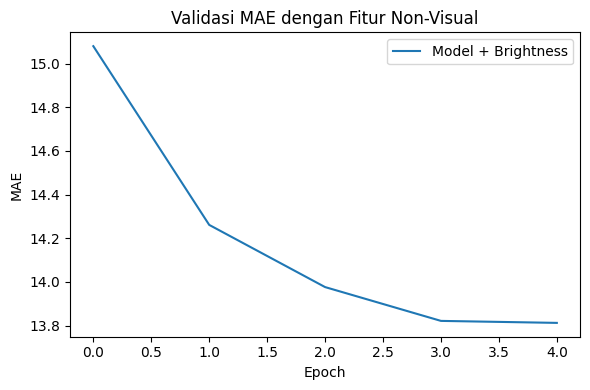

In [22]:
# ====================================================
# 🧩 4️⃣ Tambah Fitur Non-Visual — Brightness Rata-rata
# ====================================================
def get_brightness(path):
    img = Image.open(path).convert("L")  # grayscale
    return np.array(img).mean() / 255.0

df['brightness'] = df['path'].apply(get_brightness)

# Split ulang
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

def load_image_with_feat(path, label, brightness):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    img = tf.cast(img, tf.float32) / 255.0
    return img, (tf.cast(label, tf.float32), tf.cast(brightness, tf.float32))

train_ds_feat = tf.data.Dataset.from_tensor_slices(
    (train_df['path'], train_df['Pawpularity'], train_df['brightness'])
).map(load_image_with_feat, num_parallel_calls=tf.data.AUTOTUNE).batch(64).prefetch(tf.data.AUTOTUNE)

val_ds_feat = tf.data.Dataset.from_tensor_slices(
    (val_df['path'], val_df['Pawpularity'], val_df['brightness'])
).map(load_image_with_feat, num_parallel_calls=tf.data.AUTOTUNE).batch(64).prefetch(tf.data.AUTOTUNE)

# Model multimodal (gambar + fitur numerik)
img_input = tf.keras.Input((IMG_SIZE, IMG_SIZE, 3))
num_input = tf.keras.Input((1,))

base = tf.keras.applications.EfficientNetB0(include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet')
base.trainable = False
x = tf.keras.applications.efficientnet.preprocess_input(img_input * 255.0)
x = base(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Concatenate()([x, num_input])  # gabungkan fitur brightness
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1)(x)

model_feat = tf.keras.Model([img_input, num_input], outputs)
model_feat.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_feat.summary()

# Training
def data_gen(ds):
    for img, (label, bright) in ds:
        yield (img, bright), label

train_gen = tf.data.Dataset.from_generator(lambda: data_gen(train_ds_feat),
                                           output_signature=((tf.TensorSpec(shape=(None, IMG_SIZE, IMG_SIZE, 3), dtype=tf.float32),
                                                              tf.TensorSpec(shape=(None,), dtype=tf.float32)),
                                                             tf.TensorSpec(shape=(None,), dtype=tf.float32)))

val_gen = tf.data.Dataset.from_generator(lambda: data_gen(val_ds_feat),
                                         output_signature=((tf.TensorSpec(shape=(None, IMG_SIZE, IMG_SIZE, 3), dtype=tf.float32),
                                                            tf.TensorSpec(shape=(None,), dtype=tf.float32)),
                                                           tf.TensorSpec(shape=(None,), dtype=tf.float32)))

history_feat = model_feat.fit(train_gen, validation_data=val_gen, epochs=5)

# 🔍 Output: bandingkan hasil dengan model sebelumnya
plt.figure(figsize=(6,4))
plt.plot(history_feat.history['val_mae'], label='Model + Brightness')
plt.title("Validasi MAE dengan Fitur Non-Visual")
plt.xlabel("Epoch"); plt.ylabel("MAE"); plt.legend(); plt.tight_layout(); plt.show()


## Penugasan

### Uji Coba Prediksi Usia Saya

In [ ]:
# ====================================================
# 🧩 Prediksi Umur dari Wajah (UTKFace + Foto Pribadi)
# ====================================================

# ========== 1️⃣ IMPORT & SETUP ==========
import os, glob, io
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from google.colab import files

print("✅ Library berhasil diimpor.")

# ========== 2️⃣ DOWNLOAD DATASET ==========
!mkdir -p utk
!wget -q https://github.com/xialuxi/UTKFace/raw/main/UTKFace.zip -O /content/utk.zip
!unzip -qo /content/utk.zip -d /content/utk/

files = glob.glob("/content/utk/UTKFace/*.jpg")
print(f"Total gambar ditemukan: {len(files)}")

# ========== 3️⃣ PREPROCESSING ==========
IMG_SIZE = 64

def load_data(files):
    X, y = [], []
    for f in files:
        try:
            age = int(os.path.basename(f).split("_")[0])
            img = Image.open(f).convert("RGB").resize((IMG_SIZE, IMG_SIZE))
            X.append(np.array(img) / 255.0)
            y.append(age)
        except:
            continue
    return np.array(X, dtype=np.float32), np.array(y, dtype=np.float32)

# Ambil sebagian agar cepat
X, y = load_data(files[:5000])
print(f"Dataset shape: {X.shape}, Label shape: {y.shape}")

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ========== 4️⃣ BANGUN MODEL CNN ==========
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # output umur
])

model.compile(optimizer='adam', loss='mae', metrics=['mae'])
print("✅ Model CNN siap dilatih.")
model.summary()

# ========== 5️⃣ TRAINING ==========
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=64,
    verbose=1
)

plt.figure(figsize=(6,4))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE (tahun)')
plt.legend()
plt.title("Training Performance")
plt.show()

# ========== 6️⃣ EVALUASI ==========
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"📊 MAE pada data test: {test_mae:.2f} tahun")

model.save("age_model.h5")
print("✅ Model disimpan sebagai age_model.h5")

# ========== 7️⃣ PREDIKSI FOTO PRIBADI ==========
print("\n" + "="*60)
print("🧍‍♂️ PREDIKSI UMUR DARI FOTO PRIBADI")
print("="*60)
print("📸 Silakan upload 1 atau beberapa foto wajah kamu...")

uploaded = files.upload()

def preprocess_image(img_bytes):
    img = Image.open(io.BytesIO(img_bytes)).convert("RGB")
    img_resized = img.resize((IMG_SIZE, IMG_SIZE))
    img_arr = np.array(img_resized, dtype=np.float32) / 255.0
    return img_resized, tf.expand_dims(img_arr, 0)

for fname, img_bytes in uploaded.items():
    img_resized, img_tensor = preprocess_image(img_bytes)
    pred_age = model.predict(img_tensor, verbose=0).ravel()[0]

    plt.figure(figsize=(4,4))
    plt.imshow(img_resized)
    plt.title(f"Prediksi Umur: {pred_age:.1f} tahun", fontsize=12)
    plt.axis("off")
    plt.show()

    print(f"📷 {fname}: diprediksi berumur {pred_age:.1f} tahun.")


### Uji Coba Model Pawpularity menggunakan hewan peliharaan sendiri

In [1]:
# ====================================================
# 🐾 Pawpularity Model — Full Pipeline + Test with Personal Pet Photos
# ====================================================

# ✅ 0️⃣ Import Library
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from math import sqrt
from sklearn.metrics import mean_absolute_error, r2_score

# ====================================================
# 📂 1️⃣ Persiapan Dataset Pawpularity
# ====================================================

# Misal: df sudah berisi dua kolom penting → path (lokasi gambar) dan Pawpularity (label)
# Contoh:
# df = pd.read_csv("/content/train.csv")
# df["path"] = "/content/train/" + df["Id"] + ".jpg"

IMG_SIZE = 224

# Split dataset
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

def load_image(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    img = tf.cast(img, tf.float32) / 255.0
    return img, tf.cast(label, tf.float32)

train_ds = (
    tf.data.Dataset.from_tensor_slices((train_df['path'], train_df['Pawpularity']))
    .map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
    .shuffle(4096)
    .batch(64)
    .prefetch(tf.data.AUTOTUNE)
)

val_ds = (
    tf.data.Dataset.from_tensor_slices((val_df['path'], val_df['Pawpularity']))
    .map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(64)
    .prefetch(tf.data.AUTOTUNE)
)

print(f"✅ Dataset siap digunakan — {len(train_df)} untuk training, {len(val_df)} untuk validasi.")

# ====================================================
# 🧠 2️⃣ Bangun Model EfficientNetB0
# ====================================================

base = tf.keras.applications.EfficientNetB0(
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    weights='imagenet'
)
base.trainable = False  # freeze sementara

inputs = tf.keras.Input((IMG_SIZE, IMG_SIZE, 3))
x = tf.keras.applications.efficientnet.preprocess_input(inputs * 255.0)
x = base(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(1)(x)

model = tf.keras.Model(inputs, outputs)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# ====================================================
# 🏋️ 3️⃣ Training Model
# ====================================================
cb = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.5)
]

history = model.fit(train_ds, validation_data=val_ds, epochs=10, callbacks=cb, verbose=1)

# ====================================================
# 📈 4️⃣ Visualisasi Proses Training
# ====================================================
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Training vs Validation Loss (MSE)")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Train')
plt.plot(history.history['val_mae'], label='Validation')
plt.title("Training vs Validation MAE")
plt.xlabel("Epoch"); plt.ylabel("MAE"); plt.legend()
plt.tight_layout()
plt.show()

# ====================================================
# 🧮 5️⃣ Evaluasi Model
# ====================================================
y_true = val_df['Pawpularity'].values.astype(np.float32)
y_pred = np.concatenate([model.predict(batch[0], verbose=0).ravel() for batch in val_ds])
mae = mean_absolute_error(y_true, y_pred)
rmse = sqrt(np.mean((y_true - y_pred)**2))
r2 = r2_score(y_true, y_pred)
print(f"MAE  = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.3f}")

plt.figure(figsize=(5,5))
plt.scatter(y_true, y_pred, s=10, alpha=0.5)
lims = [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())]
plt.plot(lims, lims, '--', color='red')
plt.xlabel("True Pawpularity")
plt.ylabel("Predicted Pawpularity")
plt.title("True vs Predicted Pawpularity")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

# ====================================================
# 📸 6️⃣ Contoh Prediksi dari Dataset Validasi
# ====================================================
import random
sample_rows = val_df.sample(12, random_state=1)
plt.figure(figsize=(12,6))
for i, row in enumerate(sample_rows.itertuples()):
  img = Image.open(row.path)
  pred = model.predict(tf.expand_dims(load_image(row.path, row.Pawpularity)[0], 0), verbose=0).ravel()[0]
  plt.subplot(3,4,i+1)
  plt.imshow(img)
  plt.title(f"True: {row.Pawpularity}\nPred: {pred:.1f}")
  plt.axis('off')
plt.suptitle("Contoh Prediksi Skor Pawpularity", fontsize=14)
plt.tight_layout()
plt.show()

# ====================================================
# 🧩 7️⃣ Uji Model dengan Foto Pribadi / Hewan Peliharaan
# ====================================================
from google.colab import files
import io

print("📸 Silakan unggah 1 atau beberapa foto kucing / anjing / hewan peliharaan kamu...")
uploaded = files.upload()

def preprocess_image_for_model(path_or_bytes):
    """Preprocess gambar pribadi agar sesuai input model Pawpularity"""
    if isinstance(path_or_bytes, str):  # path file lokal
        img = Image.open(path_or_bytes).convert("RGB")
    else:  # file upload dari Colab (bytes)
        img = Image.open(io.BytesIO(path_or_bytes)).convert("RGB")

    img = img.resize((IMG_SIZE, IMG_SIZE))
    img = np.array(img, dtype=np.float32) / 255.0
    img_tensor = np.expand_dims(img, axis=0)
    return img_tensor

# 🔹 Prediksi Pawpularity dari gambar pribadi
for fname, file_bytes in uploaded.items():
    img_tensor = preprocess_image_for_model(file_bytes)
    pred = model.predict(img_tensor, verbose=0).ravel()[0]

    plt.figure(figsize=(4, 4))
    plt.imshow(np.squeeze(img_tensor))
    plt.axis('off')
    plt.title(f"{fname}\nPredicted Pawpularity: {pred:.1f}/100", fontsize=12)
    plt.show()

print("✅ Semua foto pribadi berhasil diprediksi oleh model Pawpularity!")


NameError: name 'df' is not defined